In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'language:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5348084%2F8893033%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240709%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240709T151237Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D540c414ca026c89a1f104221039d010ede61053e733f07c2d52b31f1299c26a5793f9698d1c016c4ebf4015d5e6fed07351df78a2ee7117bead46bf9f498327890fe87567c89d831786b2d811f11f6221fabf73900ea85371bace35fd1f82b2e4066b0996b84e9e812f9ad3d6a1179fffdfa75dbeb8661bb7a31e808accacca13eac91d81bb5baf01886e1acdb6a7678cfe0939b4d42c3f5a929c2e665d3a3b78f5b6bfd0b14b98330ee9c2bf0cb6650373c3f286b4a51ee3fb5c11eeb9356551a855b25b231031b0b481e0dba54c04439c86f092843d5ae2748c010aed1c209f8c29432cc4d0a196ddeb6a903502f364c66318a5d0c179cb749320c455d15bb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2616992 bytes downloaded
Downloaded and uncompressed: language
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language/small_vocab_fr.csv
/kaggle/input/language/small_vocab_en.csv


In [4]:
!pip install --upgrade tensorflow-gpu==2.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0


In [5]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [7]:
french = pd.read_csv('/kaggle/input/language/small_vocab_fr.csv',sep = '/t',names = ['french'])

<ipython-input-7-59af475b7841>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  french = pd.read_csv('/kaggle/input/language/small_vocab_fr.csv',sep = '/t',names = ['french'])


In [8]:
english = pd.read_csv('/kaggle/input/language/small_vocab_en.csv',sep = '/t',names = ['english'])

<ipython-input-8-52f6a7eb109e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  english = pd.read_csv('/kaggle/input/language/small_vocab_en.csv',sep = '/t',names = ['english'])


In [9]:
english.head()

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [10]:
french.head()

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


In [11]:

english.describe()

,english
count,137860
unique,129174
top,"he dislikes pears , strawberries , and limes ."
freq,3


In [12]:
french.describe()

,french
count,137860
unique,120806
top,"elle aime les bananes , citrons verts et les m..."
freq,6


In [13]:
english

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."
...,...
137855,"france is never busy during march , and it is ..."
137856,"india is sometimes beautiful during spring , a..."
137857,"india is never wet during summer , but it is s..."
137858,"france is never chilly during january , but it..."


In [14]:
french

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."
...,...
137855,"la france est jamais occupée en mars , et il e..."
137856,"l' inde est parfois belle au printemps , et il..."
137857,"l' inde est jamais mouillé pendant l' été , ma..."
137858,"la france est jamais froid en janvier , mais i..."


In [15]:

english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [16]:
french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [17]:
english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [18]:
result = pd.concat([english,french],axis=1)

In [19]:
result

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


In [20]:
print('total english records = {}'.format(len(result['english'])))

total english records = 137860


In [21]:
print('total french records = {}'.format(len(result['french'])))

total french records = 137860


In [22]:
def remove_punc(x):
    return re.sub('[!#?,.:";]','',x)

In [23]:
result['french'] = result['french'].apply(remove_punc)
result['english'] = result['english'].apply(remove_punc)

In [24]:
english_words=[]
french_words=[]

In [25]:
def get_unique_words(x,word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)

In [26]:
result['english'].apply(lambda x: get_unique_words(x,english_words))
english_words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'usually',
 'chilly',
 'july',
 'freezing',
 'november',
 'california',
 'march',
 'hot',
 'june',
 'mild',
 'cold',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'grape',
 'but',
 'my',
 'apple',
 'his',
 'favorite',
 'orange',
 'paris',
 'relaxing',
 'december',
 'busy',
 'spring',
 'never',
 'our',
 'lemon',
 'january',
 'warm',
 'lime',
 'her',
 'banana',
 'he',
 'saw',
 'a',
 'old',
 'yellow',
 'truck',
 'india',
 'rainy',
 'that',
 'cat',
 'was',
 'most',
 'loved',
 'animal',
 'dislikes',
 'grapefruit',
 'limes',
 'lemons',
 'february',
 'china',
 'pleasant',
 'october',
 'wonderful',
 'nice',
 'summer',
 'france',
 'may',
 'grapes',
 'mangoes',
 'their',
 'mango',
 'pear',
 'august',
 'beautiful',
 'apples',
 'peaches',
 'feared',
 'shark',
 'wet',
 'dry',
 'we',
 'like',
 'oranges',
 'they',
 'pears',
 'she',
 'little',
 'red',

In [27]:
def get_unique_words(x,word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)

In [28]:
result['french'].apply(lambda x: get_unique_words(x,french_words))
french_words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'généralement',
 'froid',
 'juillet',
 'gèle',
 'habituellement',
 'novembre',
 'california',
 'mars',
 'chaud',
 'juin',
 'légère',
 'fait',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'le',
 'raisin',
 'mais',
 'mon',
 'la',
 'pomme',
 'son',
 'préféré',
 "l'orange",
 'paris',
 'relaxant',
 'décembre',
 'occupé',
 'au',
 'printemps',
 'jamais',
 'chaude',
 'notre',
 'citron',
 'janvier',
 'chaux',
 'des',
 'fruits',
 'banane',
 'a',
 'vu',
 'un',
 'vieux',
 'camion',
 'jaune',
 'inde',
 'pluvieux',
 'ce',
 'chat',
 'était',
 'animal',
 'plus',
 "n'aime",
 'pamplemousse',
 'citrons',
 'verts',
 'californie',
 'ne',
 'février',
 'gel',
 'chine',
 'agréable',
 'octobre',
 'merveilleux',
 'doux',
 'tranquille',
 'à',
 "l'automne",
 'été',
 'france',
 'mois',
 'de',
 'mai',
 'frisquet',
 'déteste',
 'raisins',
 'mangues',
 'leur',
 'm

In [29]:
total_english_words = len(english_words)
total_english_words

199

In [30]:
total_french_words = len(french_words)
total_french_words

350

In [31]:
words=[]
for i in result['english']:
    for word in i.split():
        words.append(word)

In [32]:
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [33]:
english_words_counts = Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 14046,
         'fruit': 27192,
         'grape': 4848,
         'but': 63987,
         'my': 9700,
         'apple': 4848,
         'his': 9700,
         'favorite': 28332,
         'orange': 4848,
         'paris': 11334,
         'relaxing': 8696,
         'decem

In [34]:
english_words = []
english_counts = []

In [35]:
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [36]:
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

In [37]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [38]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [39]:
fig = px.bar(x=english_words,y=english_counts)
fig.show()

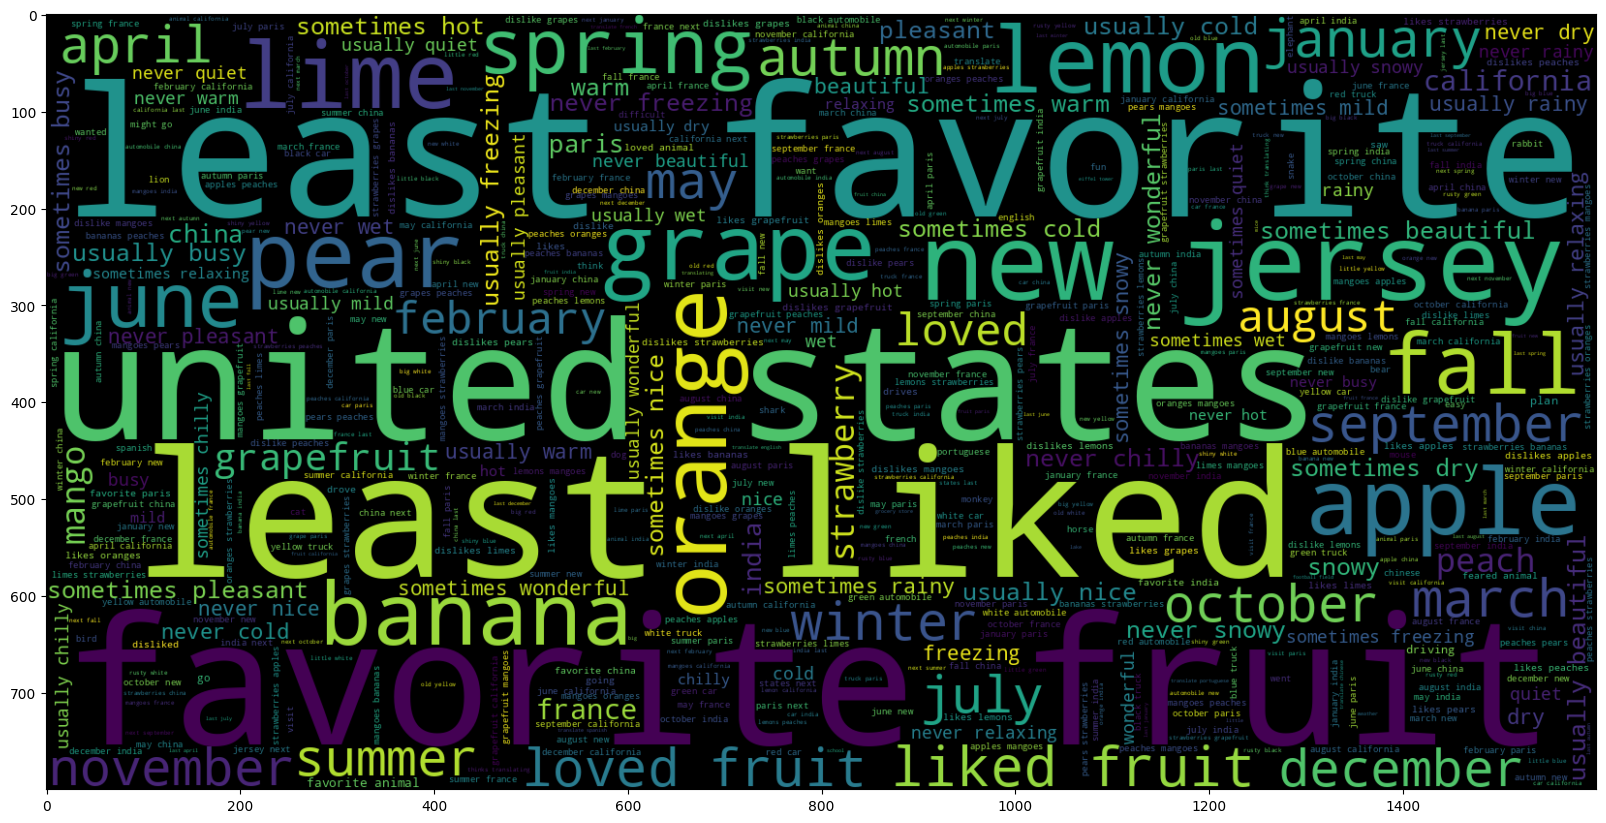

In [40]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000,width = 1600, height = 800).generate(" ".join(result.english))
plt.imshow(wc, interpolation = 'bilinear')

In [41]:
result.english[0]
nltk.word_tokenize(result.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

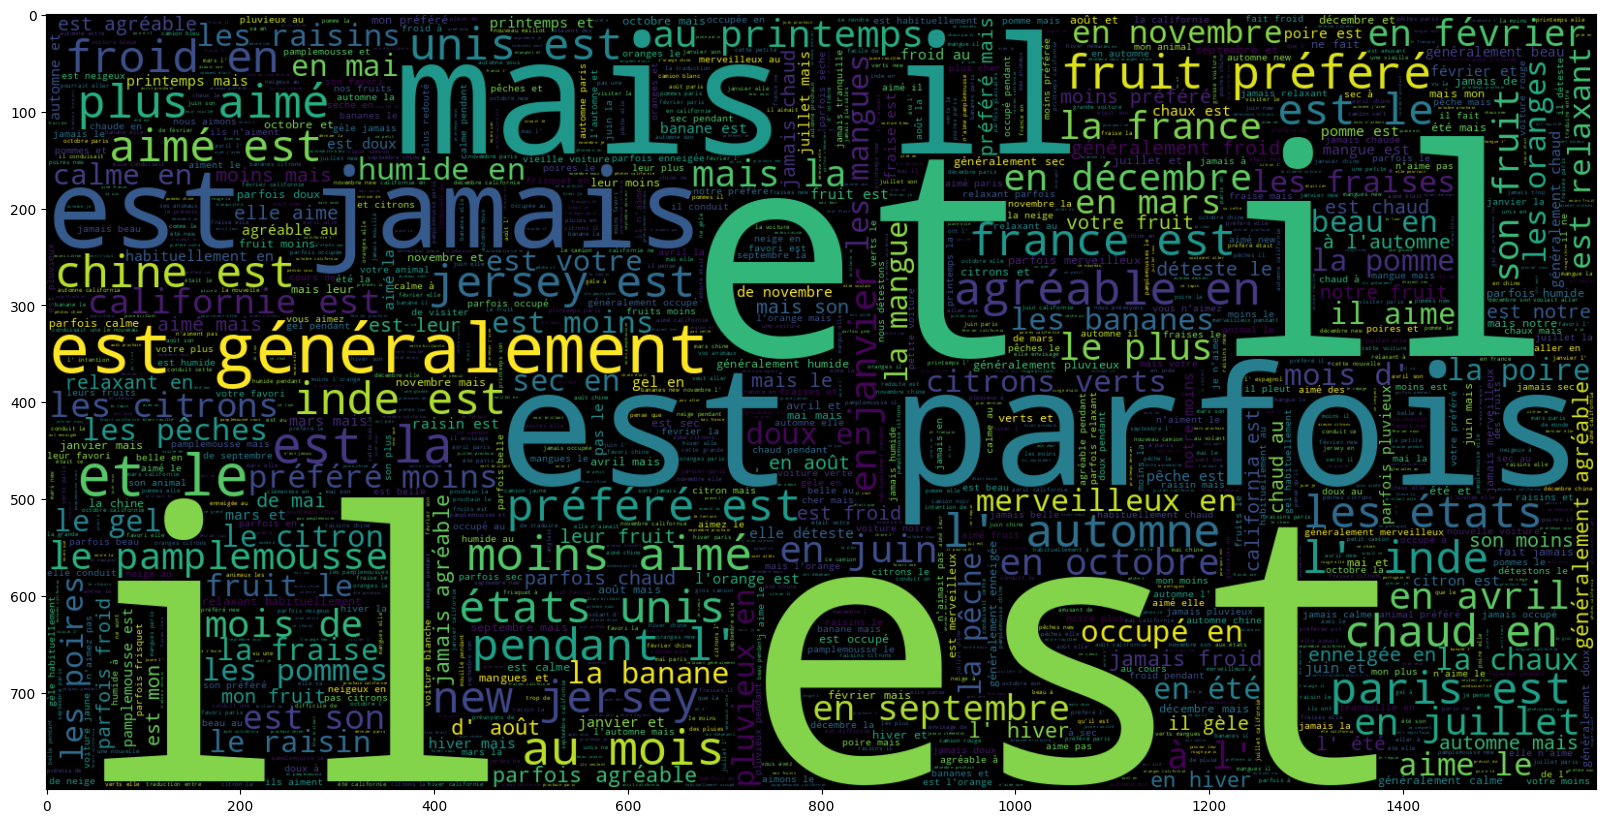

In [42]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000,width = 1600, height = 800).generate(" ".join(result.french))
plt.imshow(wc, interpolation = 'bilinear')

In [43]:
maxlen_english = -1
for doc in result.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("max number of words = ",maxlen_english)

max number of words =  15


In [44]:
maxlen_french = -1
for doc in result.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("max number of words = ",maxlen_french)

max number of words =  23


In [45]:
def tokenize_and_pad(x,maxlen):
    tokenizer = Tokenizer(char_level=False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences,maxlen=maxlen,padding='post')
    return tokenizer,sequences,padded

In [46]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(result.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(result.french, maxlen_french)

In [47]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [48]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [49]:
print("tokenized document\n",result.english[-1:].item(),"\n is : ",x_padded[-1:])

tokenized document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [50]:
print("tokenized document\n",result.french[-1:].item(),"\n is : ",y_padded[-1:])

tokenized document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [51]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [52]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [53]:
maxlen_english = max(len(seq) for seq in x_sequences)
maxlen_french = max(len(seq) for seq in y_sequences)

In [54]:
maxlen_english = max(len(word_tokenize(sentence)) for sentence in result['english'])
maxlen_french = max(len(word_tokenize(sentence)) for sentence in result['french'])


In [55]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [56]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Embedding, LSTM, RepeatVector, TimeDistributed, Dense


In [57]:
english_vocab_size = total_english_words + 1
french_vocab_size = total_french_words + 1

# Build the model
model = Sequential()
# Embedding layer
model.add(Embedding(english_vocab_size, 256, input_length= maxlen_english, mask_zero=True))
# Encoder LSTM
model.add(LSTM(256))
# RepeatVector to match the output length to the French sentence length
model.add(RepeatVector(maxlen_french))
# Decoder LSTM
model.add(LSTM(256, return_sequences=True))
# TimeDistributed layer to apply Dense layer to each time step
model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVecto  (None, 23, 256)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 23, 256)           525312    
                                                                 
 time_distributed (TimeDist  (None, 23, 351)           90207     
 ributed)                                                        
                                                                 
Total params: 1192031 (4.55 MB)
Trainable params: 119203

In [59]:
y_train = np.expand_dims(y_train , axis = 2)
y_train.shape

(124074, 23, 1, 1)

In [61]:
model.fit(x_train,y_train,batch_size=1024,validation_split=0.1,epochs=7)

Epoch 1/7
110/110 [==============================] - 423s 4s/step - loss: 1.3042 - accuracy: 0.6475 - val_loss: 1.2213 - val_accuracy: 0.6651
Epoch 2/7
110/110 [==============================] - 393s 4s/step - loss: 1.1545 - accuracy: 0.6784 - val_loss: 1.1065 - val_accuracy: 0.6870
Epoch 3/7
110/110 [==============================] - 394s 4s/step - loss: 1.0105 - accuracy: 0.7135 - val_loss: 0.9773 - val_accuracy: 0.7173
Epoch 4/7
110/110 [==============================] - 398s 4s/step - loss: 0.9058 - accuracy: 0.7395 - val_loss: 0.8911 - val_accuracy: 0.7438
Epoch 5/7
110/110 [==============================] - 400s 4s/step - loss: 0.8182 - accuracy: 0.7633 - val_loss: 0.7876 - val_accuracy: 0.7727
Epoch 6/7
110/110 [==============================] - 402s 4s/step - loss: 0.7352 - accuracy: 0.7880 - val_loss: 0.7674 - val_accuracy: 0.7768
Epoch 7/7
110/110 [==============================] - 398s 4s/step - loss: 0.6755 - accuracy: 0.8054 - val_loss: 0.7056 - val_accuracy: 0.7892


In [63]:
x_test.shape

(13786, 15)

In [64]:
x_test

array([[22,  1, 55, ...,  0,  0,  0],
       [ 5, 20, 21, ..., 53,  2, 33],
       [96, 93, 78, ...,  0,  0,  0],
       ...,
       [50, 14, 15, ...,  5, 84,  0],
       [17, 23,  1, ...,  0,  0,  0],
       [24,  1, 59, ...,  0,  0,  0]], dtype=int32)

In [65]:
x_test[0]

array([22,  1, 55,  4, 54,  7,  3,  1,  9, 56,  2, 48,  0,  0,  0],
      dtype=int32)

In [67]:
y_predict = model.predict(x_test)

431/431 [==============================] - 30s 64ms/step


In [68]:
y_predict

array([[[2.14678792e-07, 1.70892419e-03, 5.13667437e-08, ...,
         4.45017605e-08, 2.91151387e-08, 1.80499544e-08],
        [1.13750209e-08, 9.65006530e-01, 5.63992515e-08, ...,
         1.35619393e-09, 6.72006562e-10, 5.97581040e-10],
        [1.66532374e-07, 1.30955521e-02, 1.04447221e-03, ...,
         2.08208064e-08, 7.56513518e-09, 6.67367450e-09],
        ...,
        [9.99621093e-01, 1.36618110e-05, 7.92616629e-05, ...,
         4.29759804e-11, 3.66508594e-11, 1.47845763e-11],
        [9.99581158e-01, 1.33167441e-05, 9.17574289e-05, ...,
         3.93819595e-11, 3.49289694e-11, 1.45208437e-11],
        [9.99562681e-01, 1.25806027e-05, 9.79384567e-05, ...,
         3.83072948e-11, 3.42003890e-11, 1.44530993e-11]],

       [[5.17124077e-09, 2.01715875e-06, 4.74981443e-10, ...,
         2.48061127e-09, 4.10466949e-09, 2.32163666e-09],
        [1.86516150e-11, 4.79115733e-05, 2.67610998e-12, ...,
         1.21330862e-11, 1.48166271e-11, 1.09352692e-11],
        [1.00749020e-10, 

In [69]:
def prediction(x,x_tokenizer = x_tokenizer,y_tokenizer = y_tokenizer):
  predictions = model.predict(x)[0]
  id_to_word = {id:word for word,id in y_tokenizer.word_index.items()}
  id_to_word[0] = ''
  return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [70]:
def pad_to_text(padded,tokenizer):
  id_to_word = {id:word for word,id in tokenizer.word_index.items()}
  id_to_word[0] = ''
  return ' '.join([id_to_word[j] for j in padded])

In [72]:
for i in range(5):
  print('Original english word - {}\n'.format(pad_to_text(x_test[i],x_tokenizer)))
  print('Original french word - {}\n'.format(pad_to_text(y_test[i],y_tokenizer)))
  print('Predicted french word - {}\n'.format(prediction(x_test[i:i+1])))

Original english word - california is snowy during october and it is usually warm in february   

Original french word - californie est enneigée en octobre et il est habituellement chaud en février           

1/1 [==============================] - 0s 184ms/step
Predicted french word - californie est jamais en en et il est jamais en en février           

Original english word - the united states is never cold during may but it is usually beautiful in fall

Original french word - les états unis ne fait jamais froid au mois de mai mais il est généralement beau à l' automne    

1/1 [==============================] - 0s 116ms/step
Predicted french word - les états unis est jamais jamais au au mois de mais il est est à à l' automne     

Original english word - i dislike pears grapefruit and limes         

Original french word - je n'aime pas les poires les pamplemousses et les citrons verts            

1/1 [==============================] - 0s 104ms/step
Predicted french word - je n'ai